# Ploynomial Curve Fitting
## on the relation between years of experience and salary
#### [Dataset](https://www.kaggle.com/harsh45/random-salary-data-of-employes-age-wise)

Suppose that we are given a set of $N$ observations of $x$ which reflects the years of experience

> $\textbf{X} \equiv (x_1,...,x_N)^T $ 

together with corresponding observations of the values of $t$ which reflects the salary amount

> $\textbf{t} \equiv (t_1,...,t_N)^T$

Our goal is to predict the value of $t$ for some new value of $x$. In order to do that we need to discover the underlying function that maps $x$ with $t$

We can fit our data using a polynomial function of the form

> $y(x, \textbf{w}) = w_0 + w_1 x^1 + w_2 x^2 + ... + w_M x^M = \sum_{j=0}^{M}w_jx^j$

where $M$ is the order of the polynomial, and $x^j$ denotes $x$ raised to the power of $j$.

The values of the coefficients $w$ will be determined by fitting the polynomial to the data. This can be done by minimizing an error function that measures the
error between the function $y(x, w)$, for any given value of $w$, and the data points.

> $E(\textbf{w}) = \frac{1}{2} \sum_{n=1}^{N}\{y(x_n, \textbf{w}) - t_n \}^2$

##### Our goal now is to find the value of $\mathbf{w}$ that minimizes the error function $E(\textbf{w})$ 


## Now let's define our functions in Julia

In [1]:
y(x, w, m) = hcat([x.^i for i=0:m]...) * w

E(w, m) = 0.5 * sum((y(x, w, m) - t) .^ 2)

E (generic function with 1 method)

In [2]:
ENV["GKS_ENCODING"] = "utf-8"


"utf-8"

## Reading data from csv file

We are now having two columns
1. Years of experience `which is represented by` $x$
2. Salary `which is represented by` $t$

> We want to map $x$ with $t$ through a ploynomial function, So that we can predict the value of $t$ of any new value of $x$



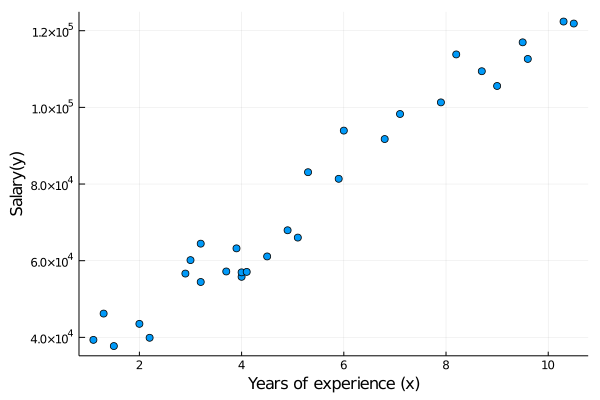

In [8]:
using DelimitedFiles
using Plots

data = readdlm("Salary_Data.csv", ',')

x = Array{Float64}(data[:, 1][2:end])
t = Array{Float64}(data[:, 2][2:end])

scatter(x, t, xlabel="Years of experience (x)", ylabel="Salary(y)", label="")

## 1. Solve it as normal equation

As a start we can fit $x$ into a polynomial function of first degree.

$y(x, \textbf{w}) = w_0 x^0 + w_1 x^1$
The function now looks like sum of product which means we can transform it into vector form to ease our calculations.

$y(x, \textbf{w}) =\begin{bmatrix}x_0^0&x_0^1\\x_1^0&x_1^1\\..\\..\\x_N^0&x_N^1\end{bmatrix}* \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$  


$y(x, \textbf{w}) =\begin{bmatrix}1&x_0\\1&x_1\\..\\..\\1&x_N\end{bmatrix}* \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \equiv \{w_0 + w_1*x_1\} + \{w_0+w_1*x_2\} + .. + .. + \{w_0 + w_1 *x_N\}$  


$\begin{bmatrix}1&x_0\\1&x_1\\..\\..\\1&x_N\end{bmatrix}* \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} = \begin{bmatrix}t_0\\t_1\\..\\..\\t_N\end{bmatrix}$

$\begin{bmatrix} w_0 \\ w_1 \end{bmatrix} = \begin{bmatrix}1&x_0\\1&x_1\\..\\..\\1&x_N\end{bmatrix}$ \ $\begin{bmatrix}t_0\\t_1\\..\\..\\t_N\end{bmatrix}$


> It is important to understand that in a system of equations that is represented in matrix from, such as
$Ax=b$
Where $A$ and $b$ are known, but not $x$.
You can solve the system by doing <br/>
$x=inv(A)*b$ <br/>
or <br/>
$x=A$ \ $b$ <br/>
The latter is much faster than the former as you do not need to do a full matrix inverse.


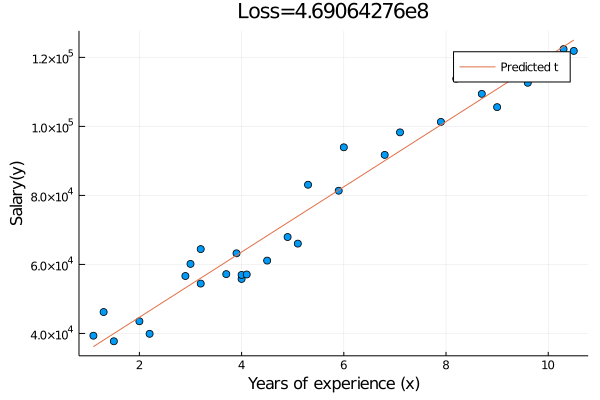

In [10]:
m = 1

w = hcat([x.^i for i=0:m]...) \ t

t_predicted = y(x, w, m)

loss = round(E(w, m))

scatter(x, t, xlabel="Years of experience (x)", ylabel="Salary(y)", label="")
plot!(x, t_predicted, label="Predicted t", title="Loss=$loss")

### We can extend our polynomial function for any number of degrees we want 
We will just need to concatenate same values of $x$ raised to the power of the degree which will extends the vector of weights to be of size `degree + 1`

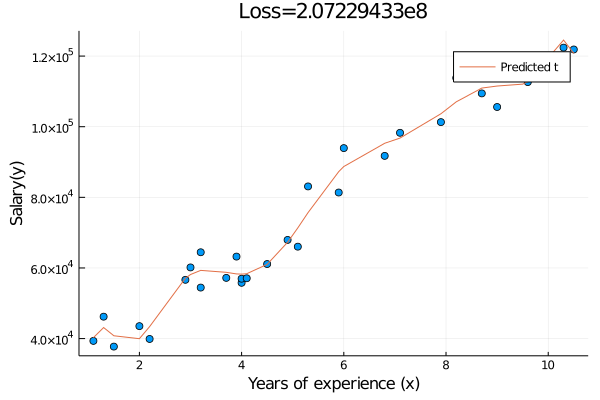

In [11]:
m = 10

w = hcat([x.^i for i=0:m]...) \ t

t_predicted = y(x, w, m)

loss = round(E(w, m))

scatter(x, t, xlabel="Years of experience (x)", ylabel="Salary(y)", label="")
plot!(x, t_predicted, label="Predicted t", title="Loss=$loss")

## 2. Gradient Descent
It's an iterative process where weights are changed in every step to reach the minumum loss. The amount of change is calculated as the partial derivative of the loss function with respect to each weight multiplied by the learning rate which is usually equals to 0.001
Suppose we have only five data inputs and five outputs.

$x = \begin{bmatrix}x_{0}\\x_{1}\\..\\..\\x_{N}\end{bmatrix} $, $t=\begin{bmatrix}t_{0}\\t_{1}\\..\\..\\t_{N}\end{bmatrix}$ 

we want to fit $x$ into a polynomial function of first degree.

$y(\textbf{x}, \textbf{w}) =\begin{bmatrix}1&x_{0}\\1&x_{1}\\..\\..\\1&x_{N}\end{bmatrix}* \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$  

$E(w) = \frac{1}{2} \{\begin{bmatrix}1&x_{0}\\1&x_{1}\\..\\..\\1&x_{N}\end{bmatrix}* \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} - \begin{bmatrix}t_{0}\\t_{1}\\..\\..\\t_{N}\end{bmatrix} \}^2$

$\frac{dE}{dW_0} = \{\begin{bmatrix}1&x_{0}\\1&x_{1}\\..\\..\\1&x_{N}\end{bmatrix}* \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} - \begin{bmatrix}t_{0}\\t_{1}\\..\\..\\t_{N}\end{bmatrix} \}^{T} * \begin{bmatrix}1\\1\\1\\1\\1\end{bmatrix}$

$\frac{dE}{dW_1} = \{\begin{bmatrix}1&x_{0}\\1&x_{1}\\..\\..\\1&x_{N}\end{bmatrix}* \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} - \begin{bmatrix}t_{0}\\t_{1}\\..\\..\\t_{N}\end{bmatrix} \}^{T} * \begin{bmatrix}x_{0}\\x_{1}\\..\\..\\x_{N}\end{bmatrix}$


We can start with weights equal to zero and at each time weights are tuned according to this function

$w_{j} = w_{j} - \alpha * \sum\frac{dE}{dW_j}$


9.7544329061e10
3.325504076e9
2.280592748e9


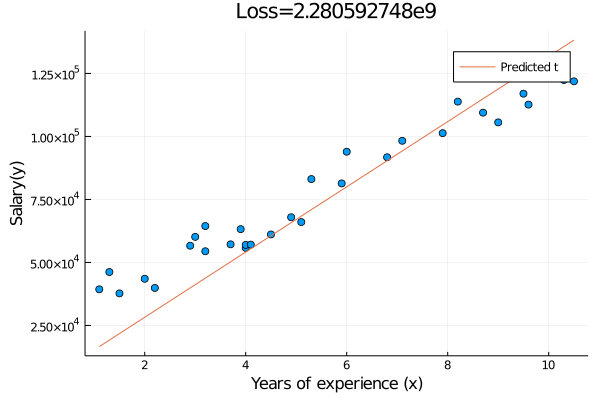

In [12]:
m = 2
w = zeros(m + 1)
α = 0.001

for i=1:3
    t_predicted = y(x, w, m)
    loss = round(E(w,m))
    println(loss)
    de_dw0 = transpose(t_predicted - t) * ones(length(x))
    de_dw1 = transpose(t_predicted - t) * x
    w[1] -= α .* de_dw0
    w[2] -= α .* de_dw1
end
scatter(x, t, xlabel="Years of experience (x)", ylabel="Salary(y)", label="")
t_predicted = y(x, w, m)
plot!(x, t_predicted, label="Predicted t", title="Loss=$loss")

## Difference between Normal Equation and Gradient Descent

| Normal Equation | Gradient Descent  |
|:---|:---|
|No need to select learning rate   | Need to select learning rate  |
|No iterations   | Needs Iterations  |
|Computationally expensive when having large vectors   |Efficient and can produce results in case of large vectors|

If $n$ is large then we can use gradient descent else we can use normal equation